# Homework 1
• Subset Sum Problem <br>
• Given a list of numbers (e.g., [2, 3, 4, 5, 12, 34]), we would like to pick 3 numbers that its sum is N (e.g., 9).<br>
• The code below return the output as true, if there is a subset that can make this happen<br>
• Problem 1: Write the approach of this recursion.<br>
• Problem 2: Modify the code below to also return the elements in the list (e.g., [4, 5]).<br>
• Problem 3: Determine the time and space complexity of the code below and your modified code.<br>


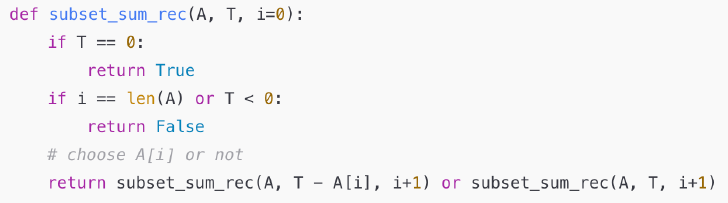

Problem 1: Write the approach of this recursion.<br>

First is to get A which is a list , T is the to sum of value that you want to find in sum of A[i] amd A[i-1]  and I is amount of how many time has you enter this function or to count<br>
if T == 0 <br>
&emsp;it will  return True //If sum of A[i] and A[i-1] is equal to T<br>
if i == len(A) or T < 0:<br>
&emsp;it will  return False //Its mean that the index that input is out of range or there are no value in A[i] and A[i-1] that sum together and equal to T<br>
if it not goes in any of those condition it will redo the recursion again until T==0 | i == len(A) or T < 0<br>

Problem 2: Modify the code below to also return the elements in the list (e.g., [4, 5]).

In [ ]:
def subset_sum_rec(A, T, i=0):
    subset = []
    # if T == 0 return True with the subset
    if T == 0:
        return True, subset 
    
    # if i is out of range or T < 0 return False
    if i >= len(A) or T < 0:
        return False, subset

    #return True if any of the two recursive calls return True with the subset that sums to T
    ok, subset = subset_sum_rec(A, T - A[i], i + 1)
    if ok:
        return True, [A[i]] + subset

    #If it still not found, try the next index without including A[i]
    ok, subset = subset_sum_rec(A, T, i + 1)
    if ok:
        return True, subset
    
print(subset_sum_rec([4, 5, 4], 9))

(True, [4, 5])


Problem 3: Determine the time and space complexity of the code below and your modified code.

In [ ]:
def subset_sum_rec(A, T, i=0):
    if T == 0:
        return True
    if i >= len(A) or T < 0:
        return False
    return subset_sum_rec(A, T - A[i], i + 1) or subset_sum_rec(A, T, i + 1)

#Time complexity: O(2^n) where n is the number of elements in A, as each element can either be included or excluded.
#Space complexity: O(n) due to the recursion stack in the worst case.

#My version from 2nd question
def subset_sum_rec(A, T, i=0):
    subset = []
    if T == 0:
        return True, subset 
    if i >= len(A) or T < 0:
        return False, subset

    ok, subset = subset_sum_rec(A, T - A[i], i + 1)
    if ok:
        return True, [A[i]] + subset
    ok, subset = subset_sum_rec(A, T, i + 1)
    if ok:
        return True, subset
#Time complexity: O(2^n)
#Space complexity: O(n)    
    
    
#Modified code to have O(n) time complexity and O(1) space complexity.
def subset_sum_rec(A, T, i=0):
    for j in range(i, len(A) - 1):
        if(A[j] + A[j+1] == T):
            return True, [A[j], A[j+1]]
    return False, []

#Time complexity: O(n).
#Space complexity: O(1).


print(subset_sum_rec([3, 3, 8, 1, 5, 4], 9))

(True, [8, 1])


# Homework 2
• Consider the problem of converting decimal to binary number using the approach below:<br>
• Problem: write a recursive approach and python source code, determine time and space complexity.<br>
• Clearly show your base case and recursive steps.<br>


In [ ]:
def Find_Binary(n):
    #if n is 0 return "0"
    if n == 0:
        return "0"
    #if n is 1 return "1"
    elif n == 1:
        return "1"
    #else return the recursion of n//2 and the string of the remainder of n/2
    else:
        return Find_Binary(n // 2) + str(n % 2)
    
print(Find_Binary(100))

1100100


# Homework 3
1. Given a list of n prime numbers (e.g., 2, 3, 5, 7, 11, 13, …). use recursion to create a linked list of size n.<br>
2. Give the following approach, write a recursive program to check if a number is a prime number. Also,<br>
determine time and complexity of your algorithm.<br>
• To check if a number is prime using recursion, a function can be defined that iteratively checks for divisibility by<br>
numbers starting from 2 up to the square root of the given number.<br>
• Clearly show your base case and recursive steps.<br>

In [ ]:
#1. Given a list of n prime numbers (e.g., 2, 3, 5, 7, 11, 13, …). use recursion to create a linked list of size n.

class ListNode:
    #Create a node with value and pointer to next node
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def create_linked_list(prime_list):
    #if the list is empty return None
    if not prime_list:
        return None
    #else create the head and recursively create the rest of the list
    else:
        head = ListNode(prime_list[0])
        head.next = create_linked_list(prime_list[1:])
        return head
    

In [ ]:
# 2. Give the following approach, write a recursive program to check if a number is a prime number. Also,
# determine time and complexity of your algorithm.
# • To check if a number is prime using recursion, a function can be defined that iteratively checks for divisibility by
# numbers starting from 2 up to the square root of the given number.
# • Clearly show your base case and recursive steps.

def is_prime(n, divisor=2):
    #Base case: if n is less than 2, it is not prime
    if n < 2:                       # Base case 1
        return False
    #Base case: if divisor exceeds the square root of n, n is prime
    if divisor * divisor > n:      # Base case 2
        return True
    #If n is divisible by the current divisor, it is not prime
    if n % divisor == 0:
        return False
    #Recursive case: check the next divisor
    return is_prime(n, divisor + 1)

#Time complexity: O(n^(1/2)).
#Space complexity: O(n^(1/2)).

print(is_prime(29))

True


# Homework 4
• Given the subset sum problem defined in Homework 1.<br>
1. Write in your understanding, explain how this memoization work. Focus on how the previous solutions are stored<br>
in intermediate memory and reused based on the original recursion explained in homework 1.<br>
2. Determine the time and space complexity of this technique.<br>


1. Write in your understanding, explain how this memoization work. Focus on how the previous solutions are stored<br>
in intermediate memory and reused based on the original recursion explained in homework 1.


In homework 1 we use recursion  subset_sum_rec(A, T) we try only take/skip. But in homework 4 we use memo[(i,t)] to keep or store the first time then if found the sane pattern we can use the value in memo instead of refind it again.

2. Determine the time and space complexity of this technique.

Time complexity is O(nT) and it can be O(n) if T is very small or constant.<br>
Space complexity is O(nT) and it can also be O(n) if T is very small or constant.

# Homework 5
• Problem: Number of combinations of coins to match a value.<br>
• Example: A merchant needs to give a change of $10 to a customer, given that coins of values $2, $3, $5 and $6<br>
are available. How many ways that a merchant can return the change of $10 to the customer?<br>
• Solution: 5 combinations: [2, 2, 2, 2, 2], [2, 2, 3, 3], [2, 2, 6], [2, 3, 5], and [5, 5]<br>
• Approach (recursion):<br>
• For each coin, there are 2 options:<br>
§ Include the current coin: Subtract the current coin's denomination from the target sum and call the<br>
count function recursively with the updated sum and the same set of coins i.e., count(coins, n, sum -<br>
coins[n-1] )<br>
§ Exclude the current coin: Call the count function recursively with the same sum and the remaining<br>
coins. i.e., count(coins, n-1, sum ). Recurrence Relation: The final result will be the sum of both cases.<br>
§ count(coins, n, sum) = count(coins, n, sum-count[n-1]) + count(coins, n-1, sum)<br>
• Base case: if the target sum is 0, there is only one way to make the sum which is not selecting any coin. So,<br>
count(coins, n, 0) = 1 (selected_coins = []). If the target sum is negative (from sum-count) or less than the<br>
smallest value of coin element, then return count(coins, n, sum) = 0.<br>
• Tasks:<br>
• Write a pseudocode and code using naïve recursion, and compute time and space complexity.<br>
• Write a pseudocode and code using memoization dynamic programming and compute time and space<br>
complexity.<br>

In [ ]:
# using naïve recursion

"""
countWays(i, remaining):
    if remaining == 0: return 1         
    if remaining < 0: return 0        
    if i == n: return 0                 

    include = countWays(i, remaining - coins[i])
    exclude = countWays(i + 1, remaining)

    return include + exclude
"""

def count_ways_recursive(coins, S):
    n = len(coins)
    def dfs(i, rem):
        if rem == 0: 
            return 1
        if rem < 0 or i == n:
            return 0
        return dfs(i, rem - coins[i]) + dfs(i + 1, rem)
    return dfs(0, S)

print(count_ways_recursive([2,3,5,6], 10)) 

#Time complexity: O(2^n) where n is the number of coins, as each coin can either be included or excluded.
#Space complexity: O(n).

# using memoization
"""
memo = dict()
countWays(i, remaining):
    if remaining == 0: return 1
    if remaining < 0: return 0
    if i == n: return 0
    if (i, remaining) in memo: return memo[(i, remaining)]

    include = countWays(i, remaining - coins[i])
    exclude = countWays(i + 1, remaining)
    memo[(i, remaining)] = include + exclude
    return memo[(i, remaining)]
"""
def count_ways_memo(coins, S):
    n = len(coins)
    memo = {}
    def dfs(i, rem):
        if rem == 0: 
            return 1
        if rem < 0 or i == n:
            return 0
        if (i, rem) in memo:
            return memo[(i, rem)]
        memo[(i, rem)] = dfs(i, rem - coins[i]) + dfs(i + 1, rem)
        return memo[(i, rem)]
    return dfs(0, S)

print(count_ways_memo([2,3,5,6], 10))

#Time complexity: O(n*S) where n is the number of coins and S is the target sum, as each state (i, rem) is computed only once.
#Space complexity: O(n*S).

5
5
